In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 22,        # Axis title
    "axes.labelsize": 20,         # Axis labels
    "xtick.labelsize": 18,        # X-ticks
    "ytick.labelsize": 18,        # Y-ticks
    "legend.fontsize": 18,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})


#### Kuramoto style equations of motion

In [ ]:
import sympy as sp

#  declare symbols 
r1, r2, theta1, theta2 = sp.symbols('r1 r2 theta1 theta2', real=True)
s1_z, s2_z = sp.symbols('s1z s2z', real=True)
Delta1, Delta2, V, chi, phi = sp.symbols('Delta1 Delta2 V chi phi', real=True)
i = sp.I

# define s^- and s^+ 
s1_minus = r1 * sp.exp(i*theta1)
s2_minus = r2 * sp.exp(i*theta2)
s1_plus  = sp.conjugate(s1_minus)   
s2_plus  = sp.conjugate(s2_minus)

# original equations of motion for s^+ and s^z 
dot_s1_plus = -i*Delta1*s1_plus + V*(s1_plus + sp.exp(i*phi)*s2_plus)*s1_z - i*chi*s1_z
dot_s2_plus = -i*Delta2*s2_plus + V*(s1_plus*sp.exp(-i*phi) + s2_plus)*s2_z - i*chi*s2_z

dot_s1_z = -4*V*sp.re(s1_minus*(s1_plus + sp.exp(i*phi)*s2_plus)) + 4*chi*sp.im(s1_plus)
dot_s2_z = -4*V*sp.re(s2_minus*(sp.exp(-i*phi)*s1_plus + s2_plus)) + 4*chi*sp.im(sp.exp(i*phi)*s2_plus)


dot_s1_minus = sp.conjugate(dot_s1_plus)
dot_s2_minus = sp.conjugate(dot_s2_plus)

#  r and theta ---
#    dot r_i    = Re[e^{-iθ_i} · dot s^-_i]
#    r_i dotθ_i = Im[e^{-iθ_i} · dot s^-_i]
e1 = sp.exp(-i*theta1)*dot_s1_minus
e2 = sp.exp(-i*theta2)*dot_s2_minus

dot_r1     = sp.simplify(sp.re(e1))
dot_theta1 = sp.simplify(sp.im(e1)/r1)

dot_r2     = sp.simplify(sp.re(e2))
dot_theta2 = sp.simplify(sp.im(e2)/r2)

# --- 6) display final results ---
#sp.pprint(dot_r1)
# sp.pprint(dot_theta1)
# sp.pprint(dot_r2)
# sp.pprint(dot_theta2)

In [ ]:

# real parameters 
Delta1, Delta2, kappa, g, eta, phi = sp.symbols(
    'Delta1 Delta2 kappa g eta phi', real=True)

# Spin and cavity operators
s1z, s2z = sp.symbols('s1^z s2^z', real=True)
r1, r2, th1, th2 = sp.symbols('r1 r2 theta1 theta2', real=True)
i = sp.I
s1p, s2p, s1m, s2m, a, ad = sp.symbols(
    's1^+ s2^+ s1^- s2^- a ad')

# define in terms of polar coords
subs_op = {
    s1m: r1*sp.exp(-i*th1),
    s2m: r2*sp.exp(-i*th2),
    s1p: r1*sp.exp(i*th1),
    s2p: r2*sp.exp(i*th2),
}

#  original ODEs 
eqs = {
    'ds1p_dt': -i*Delta1*s1p - i*g*ad*s1z,
    'ds2p_dt': -i*Delta2*s2p - i*g*sp.exp(-i*phi)*ad*s2z,
    'ds1z_dt':  2*i*g*(ad*s1m - a*s1p),
    'ds2z_dt':  2*i*g*(sp.exp(-i*phi)*ad*s2m - sp.exp( i*phi)*a*s2p)
}

# adiabatic‑elimination 
a_ss  = -2*i*g/kappa*(s1m + sp.exp(-i*phi)*s2m) + 2*eta/kappa
ad_ss = sp.conjugate(a_ss)
subs_ae = { a: a_ss, ad: ad_ss, Delta1: 0, Delta2: 0}

#  substitute back into spins
ds1p = eqs['ds1p_dt'].subs(subs_ae)
ds2p = eqs['ds2p_dt'].subs(subs_ae)
ds1m = sp.conjugate(ds1p)
ds2m = sp.conjugate(ds2p)
ds1z = eqs['ds1z_dt'].subs(subs_ae)
ds2z = eqs['ds2z_dt'].subs(subs_ae)

# r,θ via  e^{iθ}·dσ⁻
proj1 = sp.exp(i*th1)*ds1m.subs(subs_op)
proj2 = sp.exp(i*th2)*ds2m.subs(subs_op)

dot_r1     = sp.simplify(sp.re(proj1))
dot_th1    = sp.simplify(-sp.im(proj1)/r1)
dot_r2     = sp.simplify(sp.re(proj2))
dot_th2    = sp.simplify(-sp.im(proj2)/r2)
dot_sz1    = sp.simplify(ds1z.subs(subs_op))
dot_sz2    = sp.simplify(ds2z.subs(subs_op))

In [ ]:
#  final r,θ equations 
dot_r1
dot_th1
dot_r2
dot_th2
dot_sz2


4*I*g*r2*((eta + I*g*(r1*exp(I*theta1) + r2*exp(I*(phi + theta2))))*exp(I*theta1) - (eta*exp(I*(phi + theta1 + theta2)) - I*g*(r1*exp(I*(phi + theta2)) + r2*exp(I*theta1)))*exp(I*(phi + theta2)))*exp(-I*(phi + theta1 + theta2))/kappa

In [91]:
dot_th1

2*g*s1^z*(-eta*cos(theta1) + g*r2*sin(phi - theta1 + theta2))/(kappa*r1)

In [92]:
dot_th2

-2*g*s2^z*(eta*cos(phi + theta2) + g*r1*sin(phi - theta1 + theta2))/(kappa*r2)

In [ ]:
dot_r1/s1z

In [ ]:
solutions = sp.solve([
    dot_r1/s1z, dot_th1/s1z, dot_r2/s2z, dot_th2/s2z
], [r1, r2, th1, th2], dict=True)

Numerical solutions

In [88]:
r1, r2, th1, th2, chi, V, phi = sp.symbols(
    'r1 r2 th1 th2 chi V phi', real=True
)

eqs = [
    -chi*sp.sin(th1) + V*(r1 + r2*sp.cos(phi - th1 + th2)),
    
    -chi*sp.sin(th2 + phi) + V*(r2 + r1*sp.cos(phi - th1 + th2)),
    
    -chi*sp.cos(th1) + V*(r2)*sp.sin(phi - th1 + th2),
    
    -chi*sp.cos(th2 + phi) - V*(r1)*sp.sin(phi - th1 + th2),
]


def has_solution(chi_over_V, phi_val):
    """
    Returns True if nsolve finds any real solution at given chi/V (with V=1) and phi; False otherwise.
    """
    chi_val = float(chi_over_V)
    V_val = 1.0
    # initial guess: [r1, r2, th1, th2]
    guess = [1.0, 1.0, np.pi, -np.pi]
    
    try:
        sol = sp.nsolve(
            [eq.subs({chi: chi_val, V: V_val, phi: phi_val}) for eq in eqs],
            [r1, r2, th1, th2],
            guess,
            tol=1e-6,
            maxsteps=50
        )
    
        return True
    except Exception:
        return False


chi_vals = np.linspace(0.1, 1.5, 50)      # adjust range/resolution as you like
phi_vals = np.linspace(-1*np.pi, np.pi, 50)

existence = np.zeros((len(chi_vals), len(phi_vals)))

for i, chi_v in enumerate(chi_vals):
    for j, ph in enumerate(phi_vals):
        existence[i, j] = 1 if has_solution(chi_v, ph) else 0


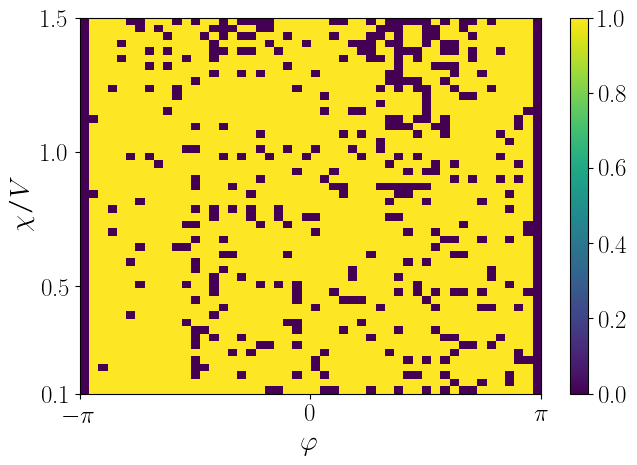

In [89]:
plt.figure(figsize=(7,5))
plt.imshow(
    existence,
    extent=(-np.pi, np.pi, chi_vals[0], chi_vals[-1]),
    aspect='auto',
    origin='upper',
    interpolation='nearest'
)
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$\chi/V$')
plt.xticks([-np.pi, 0, np.pi],
           [r'$-\pi$', 0, r'$\pi$'])
plt.yticks([0.1,0.5,1,1.5])
plt.colorbar()
plt.tight_layout()
plt.show()